# Mushroom Toxicity Classification Technical Report 

Malia Wrecker,
Tommy Dunne

CPSC 322

FALL '24

## 1. Introduction

We chose to do research on a mushroom dataset. We asked to question, "can we determine if a mushroom is toxic or not based on certain mushroom charactoristics. We used classifiers KNN, and Naive Bayes, random forrest You will see below that ______ performed the best.



with an accuracy of _______ and recall of ____________, correctly classifiying _________ instances of the testing data.

In [1]:
import importlib

import mysklearn.mypytable as mypytable
importlib.reload(mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myeval
importlib.reload(mysklearn.myeval)
import mysklearn.myeval as myeval

import matplotlib.pyplot as plt
import numpy as np

import utils
importlib.reload(utils)
import utils as utils

mush_data = MyPyTable()
mush_data.load_from_file('/home/CPSC322finalProject/input_data/new_mushroom_cleaned.csv')

## 2. DATA ANALYSIS

The research that we did was classifiying mushrooms as either edible or non-edible. The orginal dataset was 54,036 instances and we downsampled it down to exactly 1,000 of each edible and non-edible classifications (2,000 total). The dataset had attributtes: cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season, and finally class. The starting data was farily clean to begin with, but they had to give numeric values to seasons of the year. When conducting our research, we used season, cap-shape, gill-attachment as the attributes to classify mushrooms. We will present desriptives of starting and downsampled data.

## DESCRIPTIVE GRAPHS OF STARTING DATA

x values: [1.0, 2.0, 3.0, 4.0] y values: [2219, 20387, 27210, 4219]


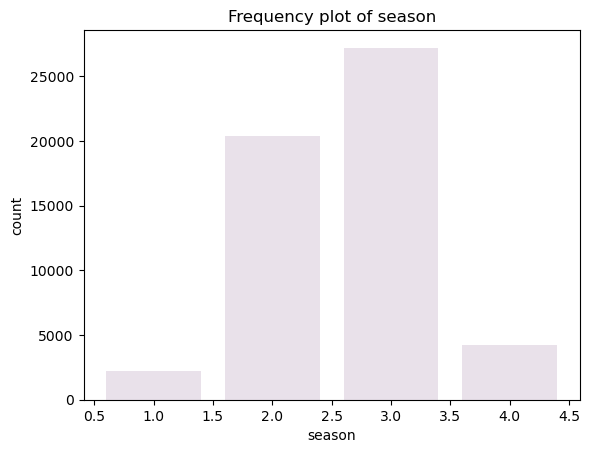

In [2]:
utils.freq_plot(mush_data.data, mush_data.column_names, "season")

It is evident from the graph that season plays a big part in mushroom growth.

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [5273, 1722, 12294, 2780, 1700, 6889, 23377]


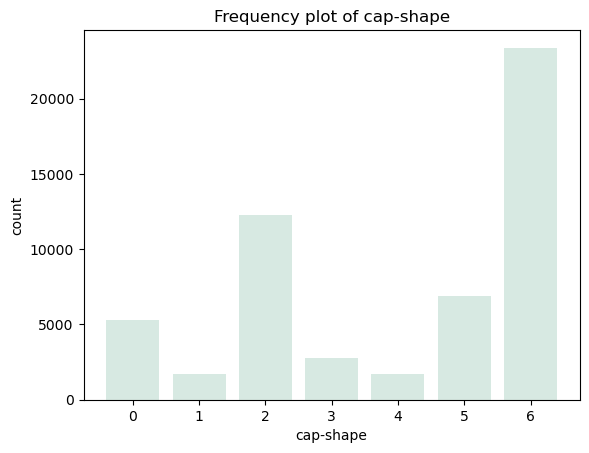

In [3]:
utils.freq_plot(mush_data.data, mush_data.column_names, "cap-shape")

caption for graph #2

x values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] y values: [19405, 10026, 4474, 3042, 4795, 5292, 7001]


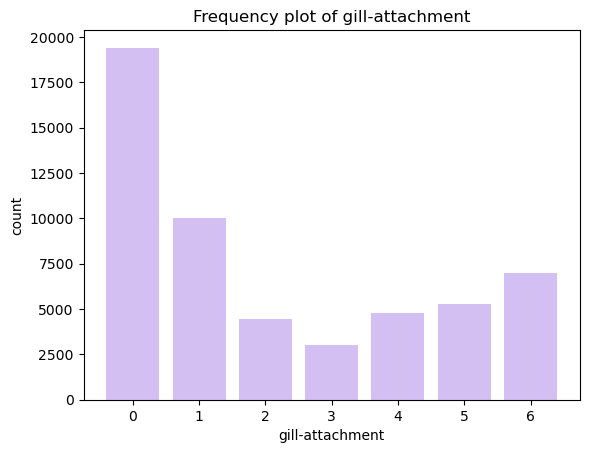

In [4]:
utils.freq_plot(mush_data.data, mush_data.column_names, "gill-attachment")

caption for graph #3

x values: [0.0, 1.0] y values: [24360, 29675]


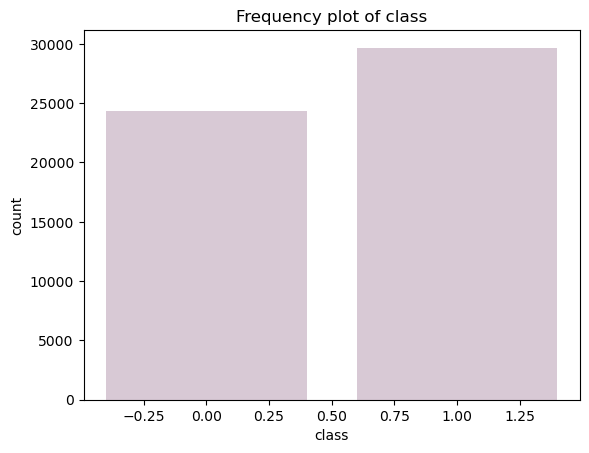

In [5]:
utils.freq_plot(mush_data.data, mush_data.column_names, "class")

The class distrobution of the original dataset is fairly even.

## MODIFYING DATASET TO BE MORE MANAGABLE

We modified the size of the dataset so that calculations are less computationaly taxing

In [6]:
df_mush = []
for i, row in enumerate(mush_data.data):
    df_mush.append(row)

print(len(df_mush))

new_data = utils.sample_classification_data(df_mush)
print(len(new_data))

54035
2000


## DESCRIPTIVE GRAPHS OF PRUNED DATA

x values: [0.0, 1.0] y values: [1000, 1000]


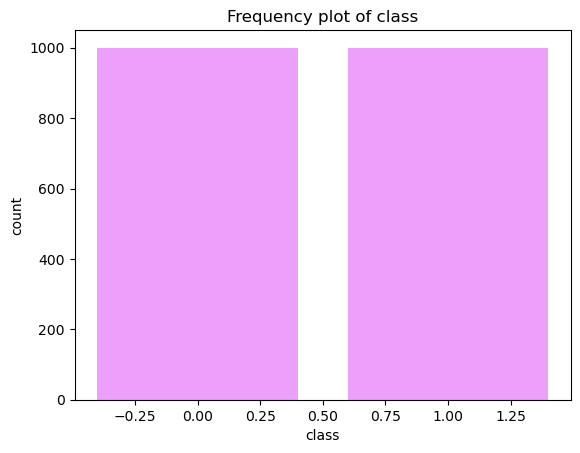

In [7]:
utils.freq_plot(new_data, mush_data.column_names, "class")

We downsampled the dataset so that we have 1,000 of each classification, that way, we can have a well trained model.

x values: [1.0, 2.0, 3.0, 4.0] y values: [83, 764, 987, 166]


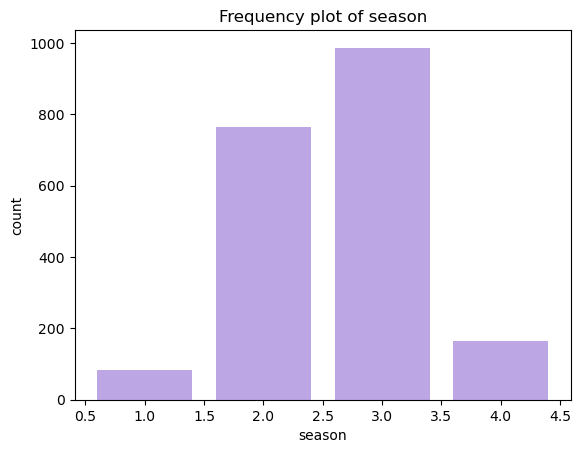

In [8]:
utils.freq_plot(new_data, mush_data.column_names, "season")

## TRAIN-TEST SPLITTING AND NORMALIZATION

In [9]:
season = [row[7] for row in new_data]
stem_width = [row[5] for row in new_data]
gill_color = [row[3] for row in new_data]
cap_diameter = [row[0] for row in new_data]

yummy_or_nah = [row[8] for row in new_data]

# normalize the data
season_norm = utils.normalize_data(season)
stem_width_norm = utils.normalize_data(stem_width)
gill_color_norm = utils.normalize_data(gill_color)
cap_diameter_norm = utils.normalize_data(cap_diameter)

data_zipped = list(zip(season_norm, stem_width_norm, gill_color_norm, cap_diameter_norm))
X_data = data_zipped

X_train, X_test, y_train, y_test = myeval.train_test_split(X_data, yummy_or_nah, test_size=0.33, random_state=1, shuffle=True)

## 3. CLASSIFICATON RESULTS

### KNN

K-Nearest Neighbors (KNN) is a simple algorithm that classifies data points based on the class of their closest neighbors. It compares a new data point to its "k" nearest points in the training set and assigns the most common class among them. It relies on distance metrics like Euclidean distance.

$$ d(p,q) = \sqrt{\sum_{i=1}^{n}(q_i - p_i)^2} $$

kNN also requires normalization of data. Normalizing data involves scaling features to a standard range, often [0, 1], or a distribution with a mean of 0 and standard deviation of 1. This ensures that all features contribute equally to the model and prevents algorithms sensitive to feature scales, like k-nearest neighbors, from being biased toward larger-scale features. It improves the stability and performance of many machine learning models.

$$ Xnormalized = \frac{(x - xmin)}{(xmax - xmin)}

In [10]:
# initiate the knn
knn_clf = MyKNeighborsClassifier(n_neighbors= 5)

knn_clf.fit(X_train, y_train)

knn_y_pred = knn_clf.predict(X_test)

Accuacy:      0.7621
Recall:       0.7531
Precision is: 0.76
Recall is:    0.75
F1 is:        0.76


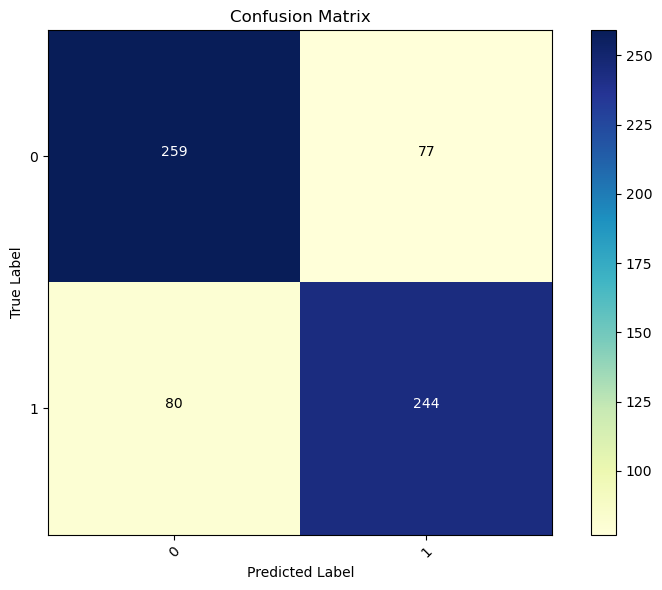

In [11]:
acc = utils.compute_accuracy(knn_y_pred, y_test)
print(f'Accuacy:      {acc:.4f}')

recall = utils.compute_recall(knn_y_pred, y_test, positive_label=1)
print(f'Recall:       {recall:.4f}')

precision, recall, f1 = utils.calculate_precision_recall_f1(y_test, knn_y_pred)
print(f'Precision is: {precision:.2f}')
print(f'Recall is:    {recall:.2f}')
print(f'F1 is:        {f1:.2f}')

utils.plot_confusion_matrix(y_test, knn_y_pred, labels=[0, 1])

### Naive Bayes

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)} $$


Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming feature independence. It predicts the class with the highest probability given the input features and is efficient for tasks like text classification. Despite its simplicity, it performs well, especially with categorical or discretized data.

In [12]:
y = [row[-1] for row in new_data]   # Labels: survived
k = 10
# Stratified k-fold split
folds = myeval.stratified_kfold_split(X_data, y, n_splits=k, shuffle=True, random_state=2)


In [13]:
# Initialize Naive Bayes classifier
nb_classifier = MyNaiveBayesClassifier()

# List to store the results for each fold
nb_results = []

# Perform cross-validation
for train_indices, test_indices in folds:
    # Split the data into training and testing sets based on the current fold
    X_train = [X_data[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]
    X_test = [X_data[i] for i in test_indices]
    nb_y_test = [y[i] for i in test_indices]

    # Train the Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    nb_y_pred = nb_classifier.predict(X_test)

    # Store the results (true labels and predicted labels)
    nb_results.append((nb_y_test, nb_y_pred))

Accuracy:     0.56
Error Rate:   0.44
Precision is: 0.76
Recall is:    0.75
F1 is:        0.76


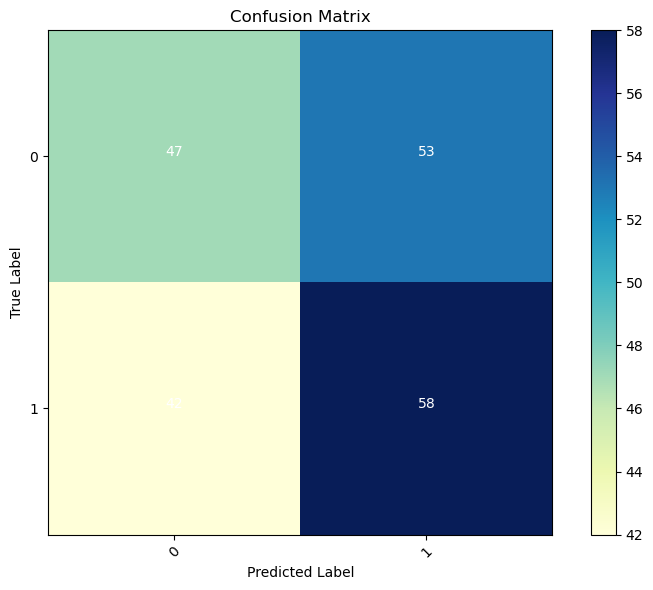

In [14]:
# Accuracy and Error Rate
nb_accuracy, nb_error_rate = utils.calculate_accuracy_error_rate(nb_results)
# Display the results
print(f"Accuracy:     {nb_accuracy:.2f}")
print(f"Error Rate:   {nb_error_rate:.2f}")

precision_nn, recall_nn, f1_nn = utils.calculate_precision_recall_f1(nb_y_test, nb_y_pred)
print(f'Precision is: {precision:.2f}')
print(f'Recall is:    {recall:.2f}')
print(f'F1 is:        {f1:.2f}')

utils.plot_confusion_matrix(nb_y_test, nb_y_pred, labels=[0, 1])
# print(nb_y_pred)
# print(nb_y_test)

## RANDOM FORREST

The decision tree algorithm is a supervised machine learning method used for classification and regression tasks. It splits data into subsets based on feature values, forming a tree structure where each internal node represents a decision (based on a feature and threshold), each branch represents an outcome of the decision, and each leaf node represents a final prediction (class label or value). The algorithm uses measures like Gini Index, Information Gain, or Gain Ratio to decide the best feature to split at each node, aiming to maximize the separation of data classes.

$$ Gini = 1 - \sum_{i=1}^k \pi^2 $$

$$ Entropy = - \sum_{i=1}^k \pi\log_2(\pi) $$

$$ Information Gain = ENTROPY_{parent} - \sum_{j=1}^n \frac{n_j}{N} $$

$$ Split Information = \sum_{i=1}^n \log(\pi x_i) $$

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


In [19]:
rf_clf = MyRandomForestClassifier(N=100, M=20, F=2)
# rf_clf.fit(X_train, y_train)
# rf_results = rf_clf.predict(X_test)
print(X_train)
print(y_train)

# Accuracy and Error Rate
rf_accuracy, rf_error_rate = utils.calculate_accuracy_error_rate(rf_results)
# Display the results
print(f"Accuracy:     {rf_accuracy:.2f}")
print(f"Error Rate:   {rf_error_rate:.2f}")

# precision_nn, recall_nn, f1_nn = utils.calculate_precision_recall_f1(rf_y_test, _y_pred)
# print(f'Precision is: {precision:.2f}')
# print(f'Recall is:    {recall:.2f}')
# print(f'F1 is:        {f1:.2f}')



[(0.0, 0.8241262683201804, 0.9090909090909091, 0.35832004253056887), (0.6666666666666666, 0.34413754227733934, 0.45454545454545453, 0.3141945773524721), (0.6666666666666666, 0.3134160090191657, 0.0, 0.291866028708134), (1.0, 0.16234498308906425, 1.0, 0.22807017543859648), (0.3333333333333333, 0.16770011273957158, 0.6363636363636364, 0.19085592769803297), (0.3333333333333333, 0.3043968432919955, 0.9090909090909091, 0.24667729930887825), (0.6666666666666666, 0.08850056369785794, 0.2727272727272727, 0.17012227538543329), (1.0, 0.6499436302142052, 0.45454545454545453, 0.5736310473152578), (1.0, 0.5873731679819617, 0.8181818181818182, 0.5454545454545454), (0.3333333333333333, 0.23083427282976324, 1.0, 0.1419457735247209), (0.6666666666666666, 0.4047350620067644, 1.0, 0.24880382775119617), (0.6666666666666666, 0.7336527621195039, 0.9090909090909091, 0.7320574162679426), (0.6666666666666666, 0.6028748590755355, 1.0, 0.7187666135034556), (1.0, 0.544250281848929, 0.0, 0.39128123338649656), (0.6

NameError: name 'rf_results' is not defined

## CONCLUSION

Our research on mushroom classificatiion was a succeess. To make our project less computationally taxing, we downsampled our data down from 54,036 to 1,000 random of each classifiactions (2000 total). We decided to go with KNN, Naive Bayes, and random forrest because we wanted to see how a conceptually simple algorithm like KNN would perform on our data, and since we had a perfect split of 1,000 0 and 1,000 1 classifications, we thought it would be interesting to see how the model would perfrom. We chose to go with Naive Bayes beacause _________BLAH________. We implemented random forrest because it was reuired for the project and we were curiouse to see how decision tree classifing would work on our dataset ____more____. Where the two of us can improve the project by using more of the extra instances we have in our dataset to further train the models, we had to cut the dataset down because calculations were taking too long.

## Acknowledgments

In [177]:
print('mo is an alt girl')

mo is an alt girl
